<a href="https://colab.research.google.com/github/ekomey/SVR-Regression/blob/Essam's-Branch/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler,RobustScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
data.head()

Saving Metro_Interstate_Traffic_Volume.csv to Metro_Interstate_Traffic_Volume.csv


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918


In [5]:
le =LabelEncoder()

Holiday_labels = le.fit_transform(data['holiday'])

{index: label for index , label in enumerate(le.classes_)}

{0: 'Christmas Day',
 1: 'Columbus Day',
 2: 'Independence Day',
 3: 'Labor Day',
 4: 'Martin Luther King Jr Day',
 5: 'Memorial Day',
 6: 'New Years Day',
 7: 'None',
 8: 'State Fair',
 9: 'Thanksgiving Day',
 10: 'Veterans Day',
 11: 'Washingtons Birthday'}

In [6]:
weather_main = le.fit_transform(data['weather_main'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'Clear',
 1: 'Clouds',
 2: 'Drizzle',
 3: 'Fog',
 4: 'Haze',
 5: 'Mist',
 6: 'Rain',
 7: 'Smoke',
 8: 'Snow',
 9: 'Squall',
 10: 'Thunderstorm'}

In [7]:
weather_description = le.fit_transform(data['weather_description'])
{index: label for index , label in enumerate(le.classes_)}

{0: 'SQUALLS',
 1: 'Sky is Clear',
 2: 'broken clouds',
 3: 'drizzle',
 4: 'few clouds',
 5: 'fog',
 6: 'freezing rain',
 7: 'haze',
 8: 'heavy intensity drizzle',
 9: 'heavy intensity rain',
 10: 'heavy snow',
 11: 'light intensity drizzle',
 12: 'light intensity shower rain',
 13: 'light rain',
 14: 'light rain and snow',
 15: 'light shower snow',
 16: 'light snow',
 17: 'mist',
 18: 'moderate rain',
 19: 'overcast clouds',
 20: 'proximity shower rain',
 21: 'proximity thunderstorm',
 22: 'proximity thunderstorm with drizzle',
 23: 'proximity thunderstorm with rain',
 24: 'scattered clouds',
 25: 'shower drizzle',
 26: 'shower snow',
 27: 'sky is clear',
 28: 'sleet',
 29: 'smoke',
 30: 'snow',
 31: 'thunderstorm',
 32: 'thunderstorm with drizzle',
 33: 'thunderstorm with heavy rain',
 34: 'thunderstorm with light drizzle',
 35: 'thunderstorm with light rain',
 36: 'thunderstorm with rain',
 37: 'very heavy rain'}

In [8]:
data['holiday'] = le.fit_transform(data['holiday'])
data['weather_main'] = le.fit_transform(data['weather_main'])
data['weather_description'] = le.fit_transform(data['weather_description'])

In [9]:
data.to_csv('Metro-Interstate-Traffic-Volume-Encoded.csv',header=True,index=False)

(48204, 9)
Epoch: 0
Epoch: 1000
Epoch: 2000
Epoch: 3000
Epoch: 4000
Epoch: 5000
Epoch: 6000
Epoch: 7000
Epoch: 8000
Epoch: 9000
Epoch: 10000
Epoch: 11000
Epoch: 12000
Epoch: 13000
Epoch: 14000
Epoch: 15000
Epoch: 16000
Epoch: 17000
Epoch: 18000
Epoch: 19000
Accuracy: [37099.562 37099.562 37099.562 37099.562 37099.562 37099.562 37099.562]
Prediction: [[3555.3694  3470.021   2872.598   ...  887.93787 4222.7495   323.85052]
 [3555.3694  3470.021   2872.598   ...  887.93787 4222.7495   323.85052]
 [3555.3694  3470.021   2872.598   ...  887.93787 4222.7495   323.85052]
 ...
 [3555.3694  3470.021   2872.598   ...  887.93787 4222.7495   323.85052]
 [3555.3694  3470.021   2872.598   ...  887.93787 4222.7495   323.85052]
 [3555.3694  3470.0212  2872.5981  ...  887.93787 4222.7495   323.85052]]


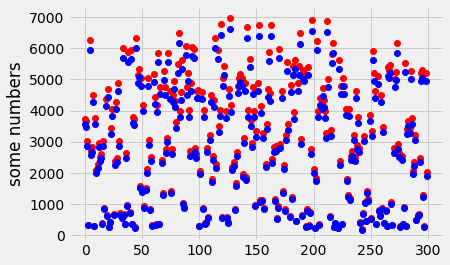

In [11]:
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf

import io
df2 = pd.read_csv('Metro-Interstate-Traffic-Volume-Encoded.csv')
df = df2.dropna()
print(df.shape)
df.head()
# Dataset is now stored in a Pandas Dataframe

xvars = ["temp", "rain_1h", "snow_1h", "clouds_all","holiday","weather_main","weather_description"]  # taking the variables that we want to keep as our predictor variables, and putting them into a NumPy Array

X = df.loc[:, xvars].values   # get X values (i.e. predictors/features) # casting our predictors into a NumPy array
y = df.loc[:, "traffic_volume"].values  # get y values (i.e., outcome/target variable)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

from sklearn.metrics import accuracy_score
accur = accuracy_score(y, y_model)

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)
# fit the model on one set of data
#model.fit(X1, y1)

# evaluate the model on the second set of data
#y2_model = model.predict(X2)
#accuracy_score(y2, y2_model)


#Network parameters
n_hidden1 = 10
n_hidden2 = 10
n_hidden3 = 10
n_input = 24101
n_output = 24101
#Learning parameters
learning_constant = 0.2
number_epochs = 20000
batch_size = 1000

#Defining the input and the output
tf.disable_v2_behavior()
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
#DEFINING WEIGHTS AND BIASES
#Biases first hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden1]))
#Biases second hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2]))
#Biases third hidden layer
b3 = tf.Variable(tf.random_normal([n_hidden3]))
#Biases output layer
b4 = tf.Variable(tf.random_normal([n_output]))
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))
#Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
#Weights connecting second hidden layer with third hidden layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_hidden3]))
#Weights connecting third hidden layer with output layer
w4 = tf.Variable(tf.random_normal([n_hidden3, n_output]))

def multilayer_perceptron(input_d):
 #Task of neurons of first hidden layer
 layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_d, w1), b1))
 #Task of neurons of second hidden layer
 layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2))
  #Task of neurons of third hidden layer
 layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, w3), b3))
 #Task of neurons of output layer
 out_layer = tf.add(tf.matmul(layer_3, w4),b4)

 return out_layer

 #Create model
neural_network = multilayer_perceptron(X)

#Define loss and optimizer
loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network,Y))
#loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

#Initializing the variables
init = tf.global_variables_initializer()

# X1 = np.savetxt('x1.txt', X1)
# X2 = np.savetxt('x2.txt', X2)
# y1 = np.savetxt('y1.txt', y1)
# y2 = np.savetxt('y2.txt', y2)

#a_file = open("x1.txt")
#lines = a_file.readlines()
#for line in lines:
#    print(line)
#a_file.close()

batch_x1=X1
batch_x2=X2

batch_y1=y1
batch_y2=y2
# print(batch_x1)
# print(batch_x2)
# print(batch_y1)
# print(batch_y2)

label=batch_y2 #+1e-50-1e-50
batch_x=np.column_stack((np.transpose(batch_x1), np.transpose(batch_x2)))
batch_y=np.column_stack((np.reshape(batch_y1, (1,24102)), np.reshape(batch_y2, (1,24102))))
# print(batch_x)
# print(batch_y)

batch_x_train=batch_x[:,0:24101]
batch_y_train=batch_y[:,0:24101]

batch_x_test=batch_x[:,24102:48204]
batch_y_test=batch_y[:,24102:48204]

label_train=label[0:24101]
label_test=label[24102:48204]

with tf.Session() as sess:
  sess.run(init)
  #Training epoch
  for epoch in range(number_epochs):

    sess.run(optimizer, feed_dict={X: batch_x_train, Y: batch_y_train})
    #Display the epoch
    if epoch % 1000 == 0:
      print("Epoch:", '%d' % (epoch))
  # Test model
  pred = (neural_network) # Apply softmax to logits
  accuracy=tf.keras.losses.MSE(pred,Y)
  print("Accuracy:", accuracy.eval({X: batch_x_train, Y: batch_y_train}))
  #tf.keras.evaluate(pred,batch_x)
  print("Prediction:", pred.eval({X: batch_x_train}))
  output=neural_network.eval({X: batch_x_train})
  plt.style.use('fivethirtyeight')
  plt.plot(batch_y_train[0,0:300], 'ro', output[0,0:300], 'bo')
  plt.ylabel('some numbers')
  plt.show()

  estimated_class=tf.argmax(pred, 1)#+1e-50-1e-50
  correct_prediction1 = tf.equal(tf.argmax(pred, 1),label)
  accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
  #print(accuracy1.eval({X: batch_x}))